In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os

data = pd.read_csv('../data/BostonHousing.csv', delimiter=',')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


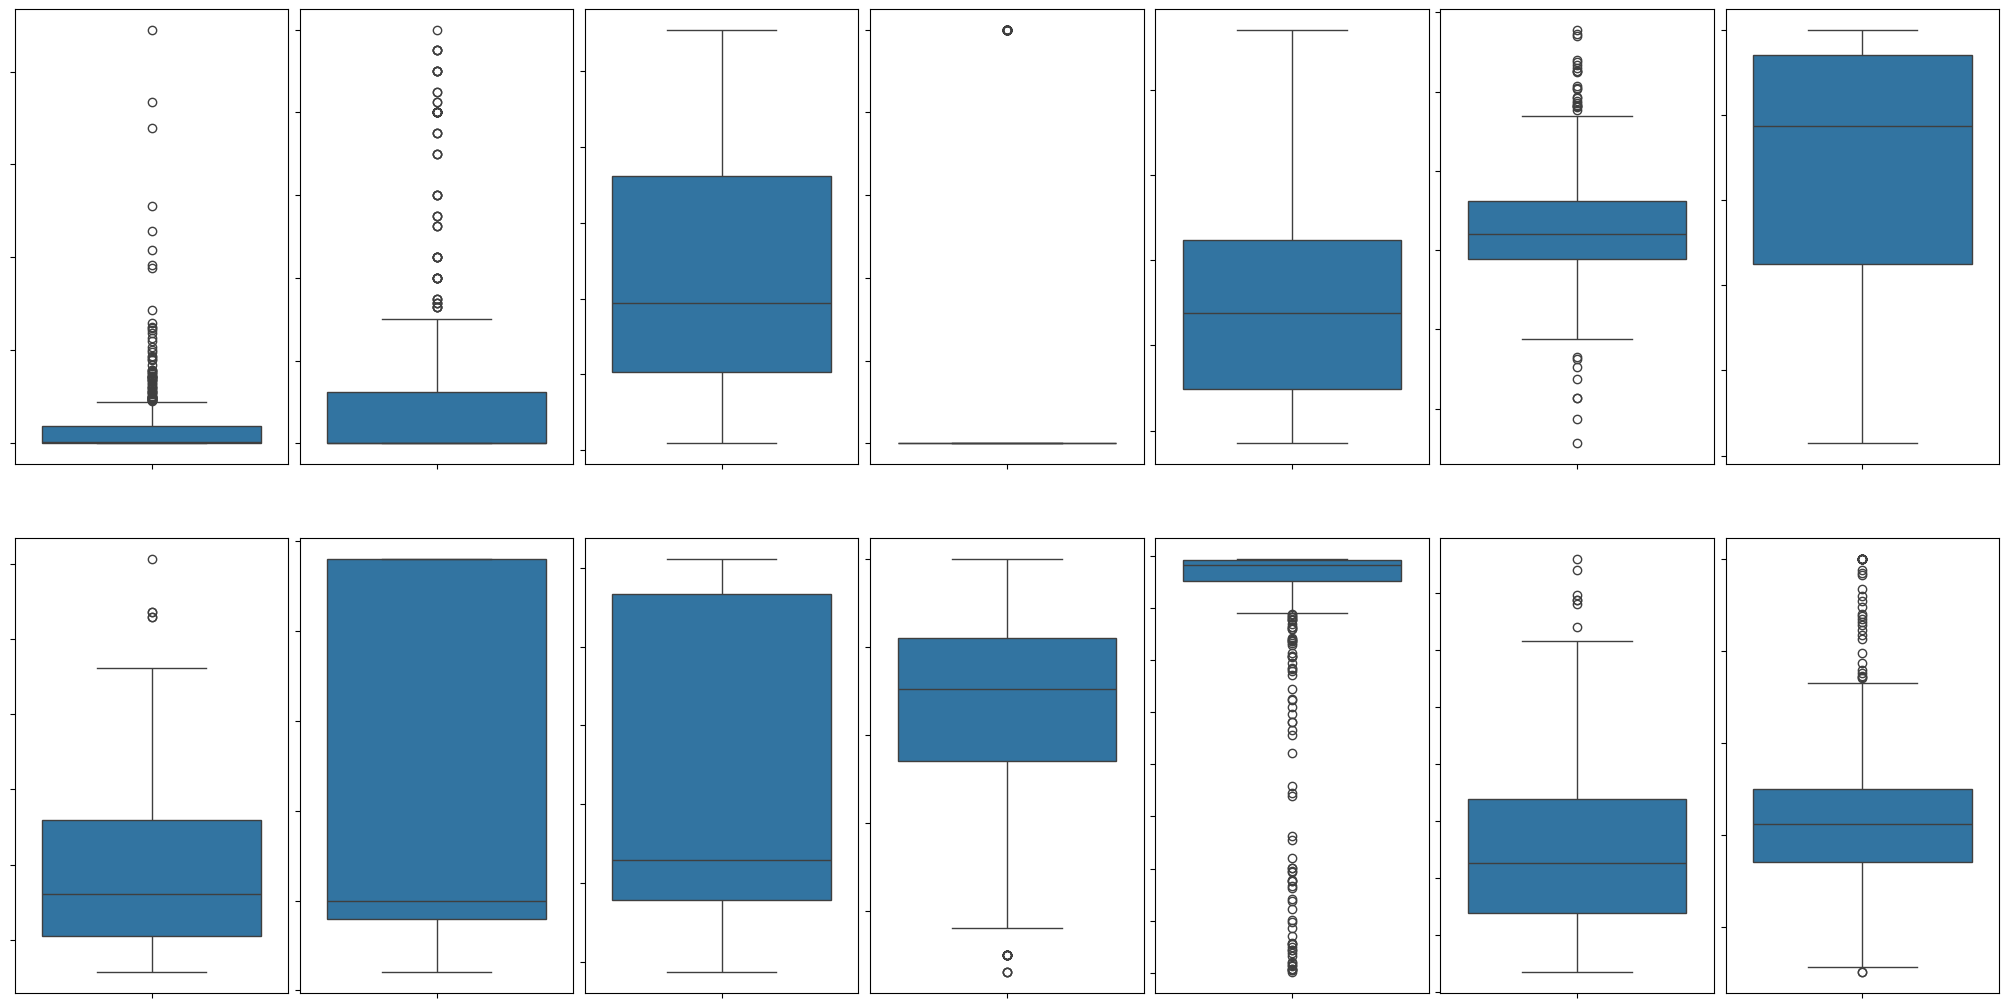

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 7 columns
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axs = axs.flatten()

# Iterate over the data items
for index, (k, v) in enumerate(data.items()):
    sns.boxplot(y=k, data=data, ax=axs[index])
    axs[index].set_ylabel('')  # Remove y-axis label
    axs[index].tick_params(axis='y', labelleft=False)  # Remove y-axis ticks

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


In [19]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column crim outliers = 13.04%
Column zn outliers = 13.44%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 5.93%
Column age outliers = 0.00%
Column dis outliers = 0.99%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptratio outliers = 2.96%
Column b outliers = 15.22%
Column lstat outliers = 1.38%
Column medv outliers = 7.91%


In [21]:
data = data[~(data['medv'] >= 50.0)]

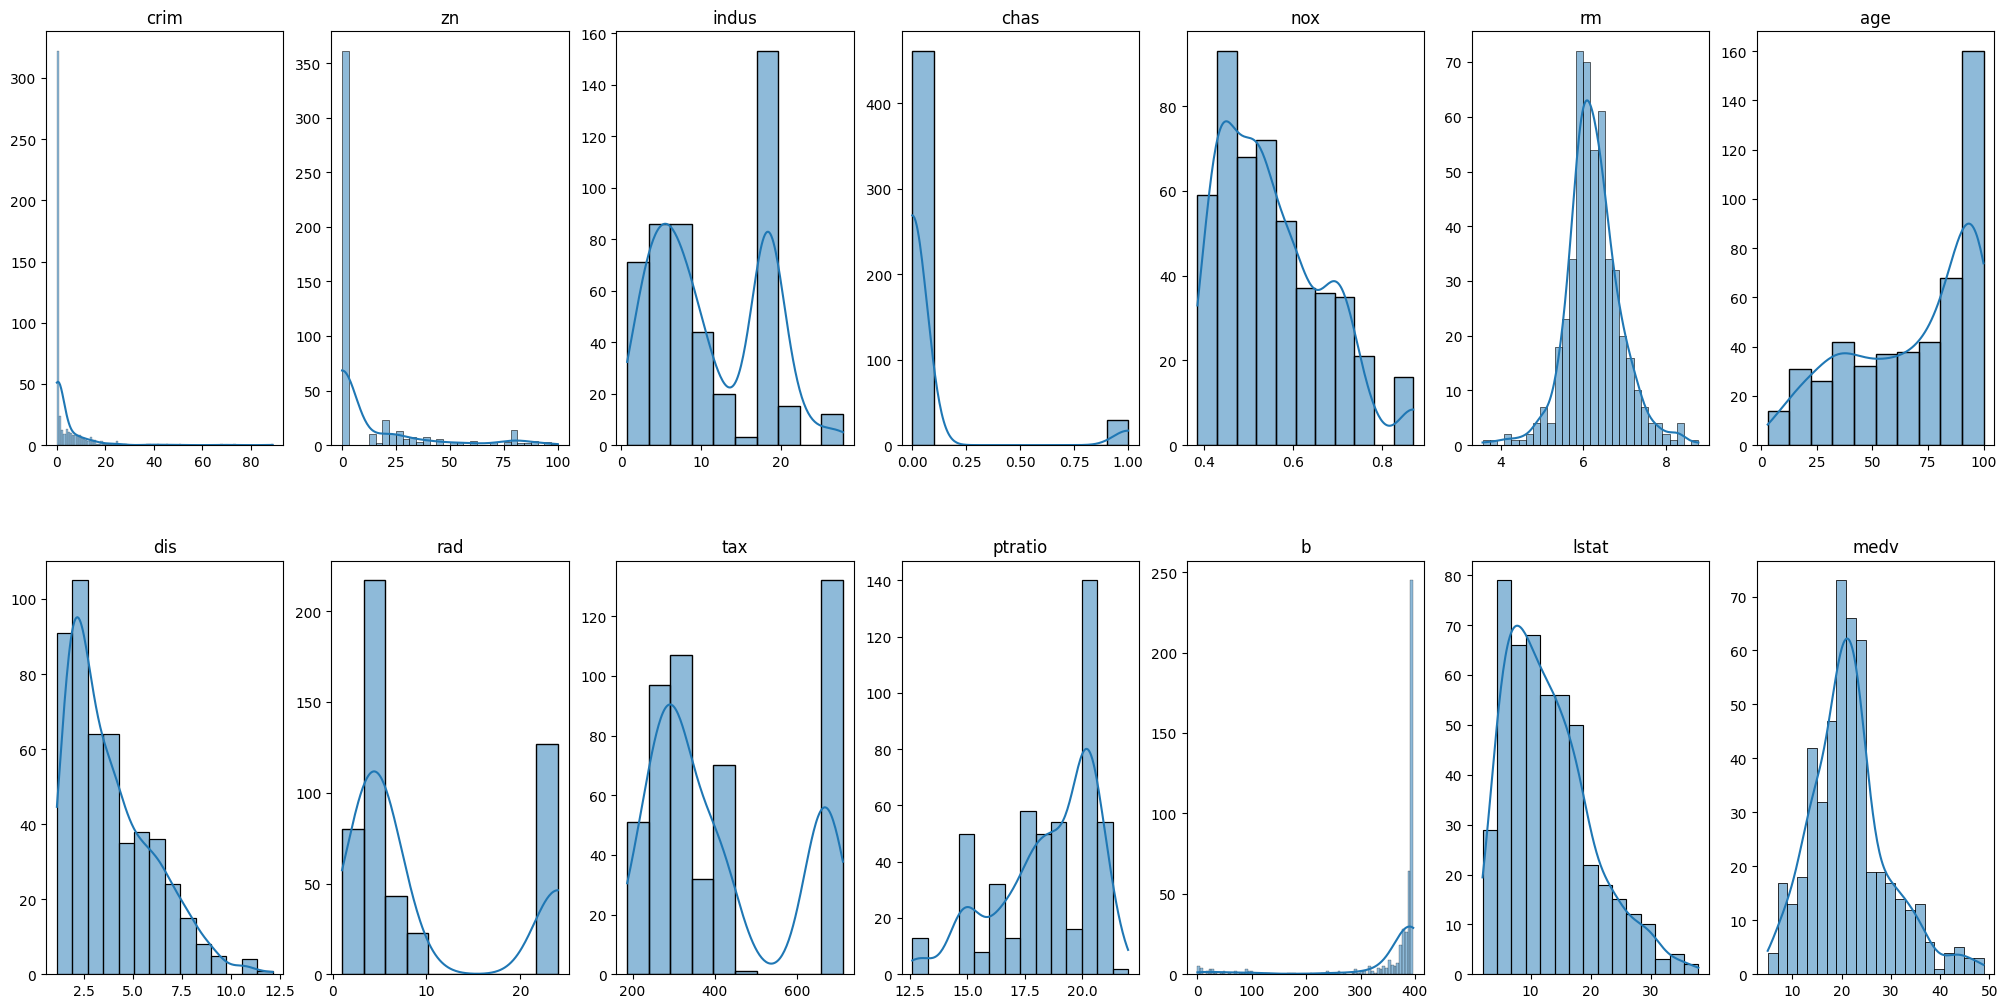

In [23]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axs = axs.flatten()

# Iterate over the data items
for index, (k, v) in enumerate(data.items()):
    sns.histplot(v, ax=axs[index], kde=True)  # kde=True adds a Kernel Density Estimate
    axs[index].set_title(k)  # Set the title for each subplot
    axs[index].set_xlabel('')  # Remove x-axis label
    axs[index].set_ylabel('')  # Remove y-axis label

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

<Axes: >

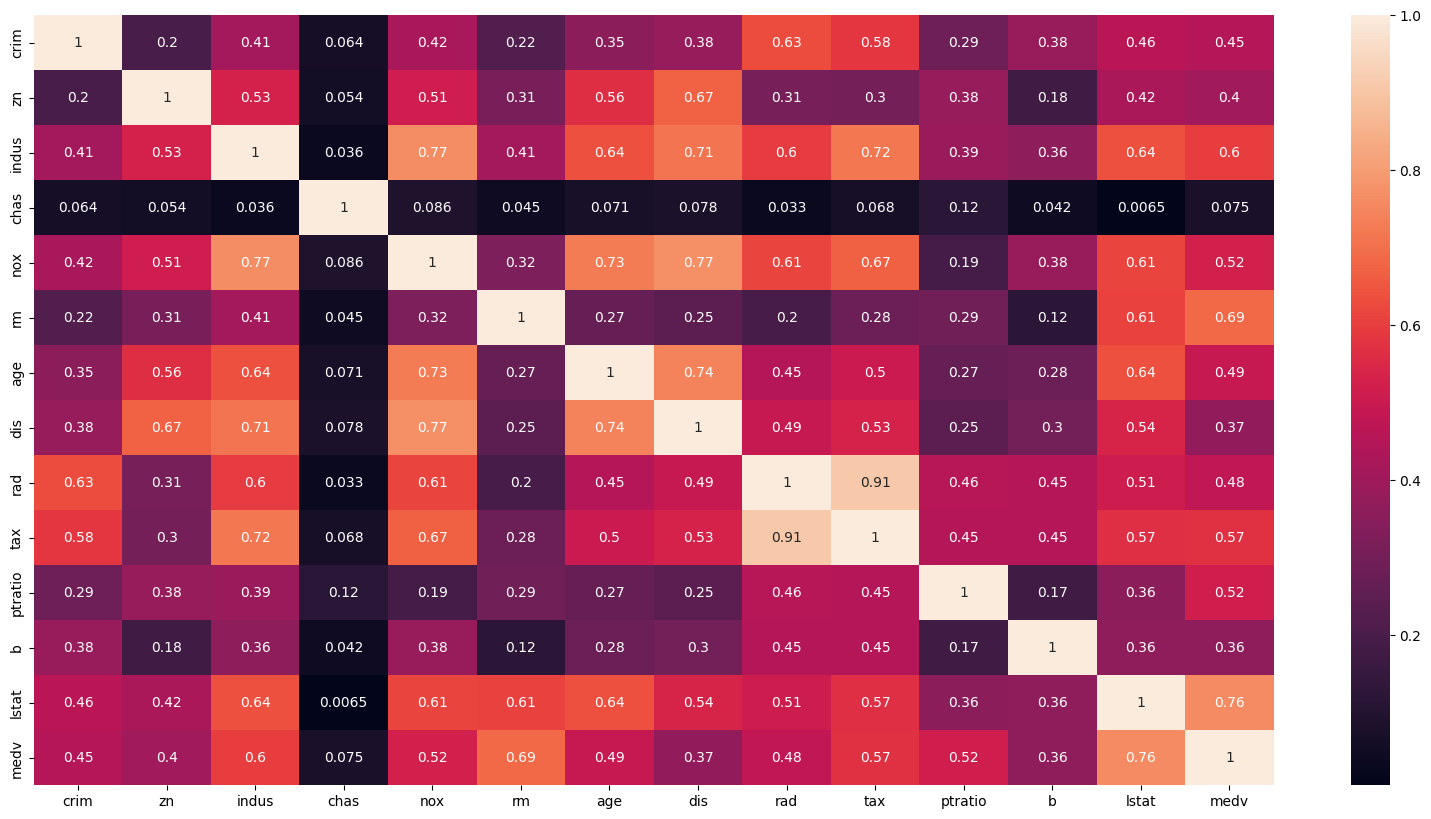

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)